# Ejercicio 02: Cálculo de la Matriz TF-IDF y Búsqueda de Consultas en un Corpus

El objetivo de este ejercicio es calcular la matriz TF-IDF de un corpus de documentos y luego aplicar una serie de consultas para recuperar los documentos más relevantes. Este ejercicio te ayudará a comprender cómo funciona el modelo de espacio vectorial y cómo se utiliza TF-IDF para ponderar términos en documentos y consultas.

Seguirás los siguientes pasos:

Pasos del Ejercicio

1. Preprocesamiento del texto:
    * Lectura del corpus desde el archivo TXT.
    * Tokenización de los documentos.
    * Normalización del texto (conversión a minúsculas, eliminación de signos de puntuación).
    * Eliminación de palabras vacías (stopwords).

2. Construcción de la matriz TF-IDF:
    * Cálculo de la frecuencia de término (TF) para cada término en cada documento.
    * Cálculo de la frecuencia inversa de documento (IDF) para cada término en el corpus.
    * Cálculo del peso TF-IDF para cada término en cada documento.

3. Procesamiento de las consultas:
    * Preprocesamiento de las consultas de manera similar a los documentos.
    * Representación de las consultas en el espacio vectorial TF-IDF.

4. Cálculo de similitudes:
    * Cálculo de la similitud entre cada consulta y los documentos del corpus utilizando la similitud del coseno.

5. Ranking de documentos:
    * Ordenar los documentos de mayor a menor similitud para cada consulta.
    * Mostrar los documentos más relevantes para cada consulta.

Consultas

Las consultas a aplicar son las siguientes:

    "inteligencia artificial en medicina"
    "beneficios de la educación a distancia"
    "realidad aumentada en videojuegos"
    "desarrollo personal y hábitos saludables"
    "futuro del comercio electrónico"
    "tecnologías en cine moderno"
    "competencias de e-sports"
    "diagnóstico con dispositivos portátiles"
    "literatura de ciencia ficción"
    "plataformas de streaming"

# 1. Preprocesamiento del texto


In [11]:
#Lectura del corpus
corpus = []
with open(r'/content/02tfidfmatrix_corpus.txt','r') as archivo:
  for linea in archivo:
    corpus.append(linea.split(':')[1])

In [12]:
print(corpus)

[' La inteligencia artificial continúa avanzando rápidamente, transformando sectores como la salud y las finanzas. Las empresas están adoptando algoritmos de aprendizaje automático para mejorar la eficiencia. Sin embargo, el desafío principal sigue siendo garantizar que las decisiones basadas en datos sean justas y no perpetúen sesgos. La ética es fundamental en este contexto.\n', ' El desarrollo de videojuegos ha alcanzado un nuevo nivel con tecnologías como la realidad aumentada y la inteligencia artificial. Los jugadores ahora pueden interactuar en mundos virtuales más inmersivos. Este crecimiento también impulsa el mercado de los e-sports, donde las competencias profesionales atraen a millones de espectadores en todo el mundo.\n', ' El comercio electrónico ha cambiado la forma en que compramos. Con la creciente demanda de compras en línea, las empresas están optimizando sus plataformas digitales para ofrecer mejores experiencias de usuario. Desde recomendaciones personalizadas hast

In [13]:
#tokenización y normalizacion corpus
corpus_norm = []
for doc in corpus:
  corpus_norm.append(doc.lower().replace('.', '').replace(',', '').split())

print(corpus_norm)


[['la', 'inteligencia', 'artificial', 'continúa', 'avanzando', 'rápidamente', 'transformando', 'sectores', 'como', 'la', 'salud', 'y', 'las', 'finanzas', 'las', 'empresas', 'están', 'adoptando', 'algoritmos', 'de', 'aprendizaje', 'automático', 'para', 'mejorar', 'la', 'eficiencia', 'sin', 'embargo', 'el', 'desafío', 'principal', 'sigue', 'siendo', 'garantizar', 'que', 'las', 'decisiones', 'basadas', 'en', 'datos', 'sean', 'justas', 'y', 'no', 'perpetúen', 'sesgos', 'la', 'ética', 'es', 'fundamental', 'en', 'este', 'contexto'], ['el', 'desarrollo', 'de', 'videojuegos', 'ha', 'alcanzado', 'un', 'nuevo', 'nivel', 'con', 'tecnologías', 'como', 'la', 'realidad', 'aumentada', 'y', 'la', 'inteligencia', 'artificial', 'los', 'jugadores', 'ahora', 'pueden', 'interactuar', 'en', 'mundos', 'virtuales', 'más', 'inmersivos', 'este', 'crecimiento', 'también', 'impulsa', 'el', 'mercado', 'de', 'los', 'e-sports', 'donde', 'las', 'competencias', 'profesionales', 'atraen', 'a', 'millones', 'de', 'espect

In [14]:
#Creacion del vocabulario
vocab = []
for i in range(0,len(corpus_norm)):
    vocab.extend(corpus_norm[i])
vocab = set(vocab)

print(len(vocab))
print(vocab)

230
{'y', 'flexibilidad', 'datos', 'transacciones', 'espectadores', 'competencias', 'este', 'streaming', 'aunque', 'incorporando', 'sean', 'enfermedades', 'es', 'ha', 'género', 'mayores', 'cada', 'perpetúen', 'utilizan', 'eficiencia', 'forma', 'implicaciones', 'temas', 'convertido', 'millones', 'la', 'crear', 'hábitos', 'interactuar', 'está', 'mundos', 'recomendaciones', 'más', 'atraen', 'ficción', 'justas', 'géneros', 'compras', 'cinematográficas', 'acceder', 'distancia', 'siendo', 'que', 'automático', 'comercio', 'realidad', 'público', 'literarios', 'sin', 'explorando', 'pueden', 'ahora', 'vida', 'se', 'cuándo', 'sus', 'real', 'personalizadas', 'jugadores', 'línea', 'inteligencia', 'contenido', 'completo', 'fundamental', 'empresas', 'e-sports', 'programas', 'como', 'aquellos', 'interacción', 'herramientas', 'impulsa', 'contexto', 'las', 'alcanzado', 'además', 'sino', 'personalizados', 'democratizando', 'hasta', 'basadas', 'personas', 'permitiendo', 'uno', 'cambiado', 'películas', 'se

In [15]:
#Creacion de la matriz termino-documento
def tdtransform(text):
    doc = []
    for word in vocab:
        if word in text:
           doc.append(1)
        else:
            doc.append(0)
    return doc

In [16]:
td_matrix = []
for i in range(0,len(corpus_norm)):
    doc = tdtransform(text=corpus_norm[i])
    td_matrix.append(doc)

print(len(td_matrix))
print(td_matrix)

8
[[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0

# 2. Construcción de la matriz TF-IDF

La matriz termino-frecuencia es la cantidad de veces que aparece el termino en el documento.

Calculo del vector idf cuya formula es **log(N/nt)** donde:

**N:** Representa la cantidad de documentos en el corpus

**nt:** Representa la cantidad de documentos en los que se encuentra el termino

In [17]:
#calculo de matriz termino-frecuencia
tf_matrix = []

for doc in corpus_norm:
  tf_vector = []
  for word in vocab:
    if word in doc:
      conteo = doc.count(word)
      #print(f'{word} - {conteo}')
      tf_vector.append(conteo)
    else:
      tf_vector.append(0)
  tf_matrix.append(tf_vector)

In [43]:
print(len(tf_matrix))
for i in range(0,len(tf_matrix)):
  print(tf_matrix[i])


8
[2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 

In [20]:
#calculo del vector nt
nt_vector = []
for j in range(0,len(td_matrix[0])):
  sum = 0
  for i in range(0,len(td_matrix)):
    sum += td_matrix[i][j]
  nt_vector.append(sum)

In [21]:
print(nt_vector)

[6, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 5, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 8, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 2, 6, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 1, 1, 8, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 6, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 3, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]


In [22]:
#Calculo del vector idf
import math

idf_vector = []
for i in range(0, len(nt_vector)):
  idf = round(math.log(len(tf_matrix)/nt_vector[i]),2)
  idf_vector.append(idf)


In [23]:
print(idf_vector)

[0.29, 2.08, 2.08, 2.08, 2.08, 2.08, 0.98, 2.08, 2.08, 2.08, 2.08, 2.08, 0.69, 0.47, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 1.39, 2.08, 2.08, 2.08, 1.39, 0.0, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 0.69, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 0.29, 2.08, 2.08, 1.39, 2.08, 2.08, 1.39, 2.08, 2.08, 2.08, 1.39, 1.39, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 0.98, 2.08, 2.08, 2.08, 1.39, 2.08, 2.08, 0.98, 2.08, 2.08, 2.08, 2.08, 2.08, 0.13, 2.08, 2.08, 2.08, 2.08, 2.08, 0.98, 2.08, 2.08, 2.08, 1.39, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 1.39, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 1.39, 0.98, 2.08, 1.39, 2.08, 1.39, 0.29, 2.08, 2.08, 1.39, 1.39, 2.08, 2.08, 2.08, 2.08, 1.39, 2.08, 2.08, 0.98, 2.08, 2.08, 1.39, 2.08, 2.08, 2.08, 0.0, 2.08, 2.08, 2.08, 2.08, 1.39, 2.08, 0.98, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 1.39, 2.08, 0.29, 2.08, 2.08, 2.08, 2.08, 2.08, 1.39, 2.08, 2.08, 2.08, 2.08, 1.39, 1.39, 2.08, 2.08,

In [24]:
#Calculo de la matriz td-idf
tfidf_matrix = []
for i in range(0,len(tf_matrix)):
  vector = []
  for j in range(0,len(tf_matrix[0])):
    vector.append(round(tf_matrix[i][j]*idf_vector[j],2))
  tfidf_matrix.append(vector)

In [25]:
for i in range(0,len(tfidf_matrix)):
  print(tfidf_matrix[i])

[0.58, 0.0, 2.08, 0.0, 0.0, 0.0, 0.98, 0.0, 0.0, 0.0, 2.08, 0.0, 0.69, 0.0, 0.0, 0.0, 0.0, 2.08, 0.0, 2.08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.08, 0.0, 0.0, 0.0, 0.0, 0.0, 2.08, 0.29, 2.08, 0.0, 0.0, 0.0, 0.0, 1.39, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.98, 0.0, 0.0, 2.08, 1.39, 0.0, 0.0, 0.98, 0.0, 0.0, 0.0, 0.0, 2.08, 0.39, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.08, 0.0, 0.0, 0.0, 0.0, 0.0, 2.08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.98, 0.0, 0.0, 0.0, 1.39, 0.0, 0.0, 0.0, 0.0, 0.0, 2.08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.08, 0.0, 0.0, 0.0, 0.0, 2.08, 0.0, 0.0, 2.08, 2.08, 0.0, 0.0, 1.39, 2.08, 0.58, 0.0, 0.0, 0.0, 0.0, 0.0, 1.39, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13, 0.0, 0.0, 2.08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.39, 0.0, 0.0, 0.0, 2.08, 0.0, 0.98, 2.08, 0.0, 0.0, 

# 3. Procesamiento de las consultas

Representar las queries como un vector en el mismo espacio de términos del corpus. Obtener la matriz tf-idf de las queries.

In [26]:
queries = ["inteligencia artificial en medicina","beneficios de la educación a distancia","realidad aumentada en videojuegos","desarrollo personal y hábitos saludables","futuro del comercio electrónico","tecnologías en cine moderno","competencias de e-sports","diagnóstico con dispositivos portátiles","literatura de ciencia ficción","plataformas de streaming"]

In [27]:
#Representar las queries en el mismo espacio de terminos del corpus.
qr_matrix = []
for i in range(0,len(queries)):
    doc = tdtransform(text=queries[i])
    qr_matrix .append(doc)

In [28]:
for i in range(0,len(qr_matrix)):
  print(qr_matrix[i])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [29]:
#Obtener la matriz tf-idf de las queries

qr_tfidf_matrix = []

for i in range(0,len(qr_matrix)):
  vector = []
  for j in range(0,len(qr_matrix[0])):
    vector.append(round(qr_matrix[i][j]*idf_vector[j],2))
  qr_tfidf_matrix.append(vector)

In [30]:
for i in range(0,len(qr_tfidf_matrix)):
  print(qr_tfidf_matrix[i])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.98, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.98, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,


# 4. Cálculo de similitudes
La similitud coseno se calcula con la siguiente formula:

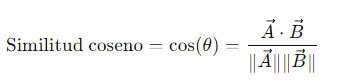

Tambien se representa de la siguiente forma:

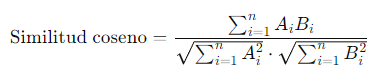

In [31]:
from math import sqrt
def similitudCoseno(v1, v2):
    similitud = []

    for i in range(0, len(v1)):
        producto = 0
        sum1 = 0
        sum2 = 0
        for j in range(0, len(v1[0])):
            producto += v1[i][j] *v2[j]
            sum1 += v1[i][j] ** 2
            sum2 +=  v2[j] ** 2

        sim = producto/(sqrt(sum1) * sqrt(sum2))
        similitud.append(round(sim,3))
    return similitud

In [44]:
similitudMatrix = []
for i in range(0,len(qr_tfidf_matrix)):
  similitudMatrix.append(similitudCoseno(tfidf_matrix, qr_tfidf_matrix[i]))

In [33]:
for i in range(0,len(similitudMatrix)):
  print(similitudMatrix[i])

[0.073, 0.082, 0.01, 0.012, 0.008, 0.086, 0.015, 0.329]
[0.004, 0.007, 0.007, 0.331, 0.004, 0.007, 0.009, 0.009]
[0.004, 0.262, 0.006, 0.008, 0.045, 0.006, 0.008, 0.111]
[0.054, 0.047, 0.0, 0.028, 0.007, 0.017, 0.332, 0.059]
[0.0, 0.001, 0.257, 0.0, 0.002, 0.06, 0.002, 0.055]
[0.057, 0.064, 0.066, 0.009, 0.168, 0.067, 0.01, 0.066]
[0.005, 0.281, 0.008, 0.01, 0.005, 0.008, 0.01, 0.01]
[0.014, 0.009, 0.007, 0.044, 0.011, 0.018, 0.003, 0.285]
[0.005, 0.008, 0.008, 0.01, 0.005, 0.294, 0.01, 0.01]
[0.0, 0.003, 0.129, 0.011, 0.187, 0.003, 0.003, 0.065]


# 5. Ranking de documentos
Se debe ordenar las queries por orden de relevancia

In [34]:
ranking = []

for i in range(0,len(similitudMatrix)):
  indices = {}
  for j in range(0,len(similitudMatrix[i])):
    indiceqr = j
    indices[indiceqr] = similitudMatrix[i][j]
  ranking.append(dict(sorted(indices.items(), key=lambda item: item[1], reverse=True)))

print(ranking)

print(len(ranking))

[{7: 0.329, 5: 0.086, 1: 0.082, 0: 0.073, 6: 0.015, 3: 0.012, 2: 0.01, 4: 0.008}, {3: 0.331, 6: 0.009, 7: 0.009, 1: 0.007, 2: 0.007, 5: 0.007, 0: 0.004, 4: 0.004}, {1: 0.262, 7: 0.111, 4: 0.045, 3: 0.008, 6: 0.008, 2: 0.006, 5: 0.006, 0: 0.004}, {6: 0.332, 7: 0.059, 0: 0.054, 1: 0.047, 3: 0.028, 5: 0.017, 4: 0.007, 2: 0.0}, {2: 0.257, 5: 0.06, 7: 0.055, 4: 0.002, 6: 0.002, 1: 0.001, 0: 0.0, 3: 0.0}, {4: 0.168, 5: 0.067, 2: 0.066, 7: 0.066, 1: 0.064, 0: 0.057, 6: 0.01, 3: 0.009}, {1: 0.281, 3: 0.01, 6: 0.01, 7: 0.01, 2: 0.008, 5: 0.008, 0: 0.005, 4: 0.005}, {7: 0.285, 3: 0.044, 5: 0.018, 0: 0.014, 4: 0.011, 1: 0.009, 2: 0.007, 6: 0.003}, {5: 0.294, 3: 0.01, 6: 0.01, 7: 0.01, 1: 0.008, 2: 0.008, 0: 0.005, 4: 0.005}, {4: 0.187, 2: 0.129, 7: 0.065, 3: 0.011, 1: 0.003, 5: 0.003, 6: 0.003, 0: 0.0}]
10


In [42]:
for i in range(len(ranking)):
  print(f'Query {i+1}: {queries[i]}\n')
  for j in range(len(ranking[i])):
    documento = list(ranking[i].keys())[j] #Para obtener los indices para buscar los documentos
    similitud = list(ranking[i].values())[j]
    print(f'Similitud: {similitud} | Documento {documento + 1}:{corpus[documento]}')
  print('------------------------------------------------------------')

Query 1: inteligencia artificial en medicina

Similitud: 0.329 | Documento 8: Los avances en la medicina están cambiando la forma en que se diagnostican y tratan las enfermedades. Desde la telemedicina hasta los dispositivos portátiles que monitorean la salud en tiempo real, la tecnología está permitiendo a los médicos ofrecer cuidados más personalizados. El futuro de la medicina es prometedor, con tratamientos más accesibles y eficaces.

Similitud: 0.086 | Documento 6: La ciencia ficción es uno de los géneros literarios más populares, explorando temas como el viaje en el tiempo, la inteligencia artificial y la vida en otros planetas. Este género no solo entretiene, sino que también invita a reflexionar sobre el futuro de la humanidad y las implicaciones de los avances tecnológicos.

Similitud: 0.082 | Documento 2: El desarrollo de videojuegos ha alcanzado un nuevo nivel con tecnologías como la realidad aumentada y la inteligencia artificial. Los jugadores ahora pueden interactuar en m